In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp drive/MyDrive/OptML/model.py .
!cp drive/MyDrive/OptML/helpers.py .

!cp drive/MyDrive/OptML/DemonRangerOptimizer/optimizers.py .
!cp drive/MyDrive/OptML/DemonRangerOptimizer/helpers_demon.py .

!cp drive/MyDrive/OptML/YellowFin/yellowfin.py .
!cp drive/MyDrive/OptML/YellowFin/helpers_yellowfin.py .

from model import *
from helpers import *

from optimizers import DemonRanger
from yellowfin import YFOptimizer

from helpers_demon import *
from helpers_yellowfin import * 

import matplotlib.pyplot as plt
import torchvision.datasets as datasets

torch.manual_seed(42)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

mnist_train = datasets.MNIST(root='./data', 
                             train=True, 
                             download=True, 
                             transform=transform)
mnist_test = torchvision.datasets.MNIST('./data/files/', 
                                        train=False, 
                                        download=True,  
                                        transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/train-images-idx3-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/files/MNIST/raw



### ADAM + LinearLR

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 180, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': LinearLR, 
              'scheduler_parameters': {'start_factor': 0.03}}

model = Net()
model.to(device)

acc_linear,losses_linear,time_linear = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 1.3425


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:538: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [0.0033450666666666666], test accuracy 0.8964
Batch 500 / 938: loss = 0.2952
Epoch 1: lr = [0.0015600357142857143], test accuracy 0.9473
Batch 500 / 938: loss = 0.1641
Epoch 2: lr = [0.0017920765550239236], test accuracy 0.9672
Batch 500 / 938: loss = 0.1009
Epoch 3: lr = [0.0021229934640522876], test accuracy 0.9721
Batch 500 / 938: loss = 0.0808
Epoch 4: lr = [0.0024813895781637713], test accuracy 0.9737
Batch 500 / 938: loss = 0.0663
Epoch 5: lr = [0.0019999999999999996], test accuracy 0.9688
Batch 500 / 938: loss = 0.0483
Epoch 6: lr = [0.0019999999999999996], test accuracy 0.9726
Batch 500 / 938: loss = 0.0348
Epoch 7: lr = [0.0019999999999999996], test accuracy 0.9743
Batch 500 / 938: loss = 0.0319
Epoch 8: lr = [0.0019999999999999996], test accuracy 0.9799
Batch 500 / 938: loss = 0.0300
Epoch 9: lr = [0.0019999999999999996], test accuracy 0.9776
Batch 500 / 938: loss = 0.0265


### ADAM + ExponentialLR

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': ExponentialLR, 
              'scheduler_parameters': {'gamma': 0.03}}

model = Net()
model.to(device)

acc_exponential,losses_exponential,time_exponential = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3217


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:575: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [1.8e-06], test accuracy 0.9585
Batch 500 / 938: loss = 0.0873
Epoch 1: lr = [5.3999999999999994e-08], test accuracy 0.9728
Batch 500 / 938: loss = 0.0721
Epoch 2: lr = [1.6199999999999998e-09], test accuracy 0.9732
Batch 500 / 938: loss = 0.0688
Epoch 3: lr = [4.859999999999999e-11], test accuracy 0.9732
Batch 500 / 938: loss = 0.0708
Epoch 4: lr = [1.4579999999999996e-12], test accuracy 0.9732
Batch 500 / 938: loss = 0.0689
Epoch 5: lr = [4.3739999999999986e-14], test accuracy 0.9732
Batch 500 / 938: loss = 0.0695
Epoch 6: lr = [1.3121999999999995e-15], test accuracy 0.9732
Batch 500 / 938: loss = 0.0725
Epoch 7: lr = [3.9365999999999986e-17], test accuracy 0.9732
Batch 500 / 938: loss = 0.0703
Epoch 8: lr = [1.1809799999999995e-18], test accuracy 0.9732
Batch 500 / 938: loss = 0.0701
Epoch 9: lr = [3.542939999999998e-20], test accuracy 0.9732
Batch 500 / 938: loss = 0.0718
Epoch 10: lr = [1.0628819999999993e-21], test accuracy 0.9732
Batch 500 / 938: loss = 0.0688
Epoc

### ADAM + CosineAnnealingLR

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 120, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': CosineAnnealingLR, 
              'scheduler_parameters': {'T_max': 5, 'eta_min': 0.02}}

model = Net()
model.to(device)

acc_cosine, losses_cosine,time_cosine = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3117


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:729: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 0: lr = [0.005273558813281839], test accuracy 0.9679
Batch 500 / 938: loss = 0.1323
Epoch 1: lr = [0.011475077640500379], test accuracy 0.9721
Batch 500 / 938: loss = 0.1698
Epoch 2: lr = [0.0167172942406179], test accuracy 0.9644
Batch 500 / 938: loss = 0.2289
Epoch 3: lr = [0.01952492235949962], test accuracy 0.9587
Batch 500 / 938: loss = 0.2279
Epoch 4: lr = [0.02], test accuracy 0.9474
Batch 500 / 938: loss = 0.1889
Epoch 5: lr = [0.016562305898749057], test accuracy 0.9566
Batch 500 / 938: loss = 0.1538
Epoch 6: lr = [-0.0025000000000000022], test accuracy 0.9626
Batch 500 / 938: loss = 0.1143
Epoch 7: lr = [-0.00231853648862395], test accuracy 0.966
Batch 500 / 938: loss = 0.0723
Epoch 8: lr = [-0.002499999999999992], test accuracy 0.9745
Batch 500 / 938: loss = 0.0454
Epoch 9: lr = [9.968943799849861e-05], test accuracy 0.9779
Batch 500 / 938: loss = 0.0320
Epoch 10: lr = [0.005273558813281835], test accuracy 0.978
Batch 500 / 938: loss = 0.0315
Epoch 11: lr = [0.01147507

### ADAM + LambdaLR

In [ ]:
def lambda3(epoch):
  return 0.95 ** epoch 

parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'optimizer': torch.optim.Adam, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25, 
              'scheduler': LambdaLR, 
              'scheduler_parameters': {'lr_lambda': lambda3}}

model = Net()
model.to(device)

acc_lambda,losses_lambda,time_lambda = run_best_model(mnist_train, mnist_test, model, parameters, device)

------ FOLD 1 -------
Batch 500 / 938: loss = 0.3240


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:249: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch 0: lr = [0.0019], test accuracy 0.9622


## SGDM

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.02,
              'momentum':0.9,
              'nesterov':False, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_sgdm,losses_sgdm,time_sgdm = run_best_model(mnist_train, mnist_test, model, parameters, device,sgdm=True)

## Nesterov

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.05,
              'momentum':0.9,
              'nesterov':True, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_nest,losses_nest,time_nest = run_best_model(mnist_train, mnist_test, model, parameters, device,sgdm=True)

## SGD

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.2, 
              'optimizer': torch.optim.SGD, 
              'batch_size': 90, 
              'folds': 5, 
              'epochs': 25}
model = Net()
model.to(device)

acc_sgd,losses_sgd,time_sgd = run_best_model(mnist_train, mnist_test, model, parameters, device,sgd=True)

### YellowFin

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.02, 
              'batch_size': 180, 
              'folds': 5, 
              'epochs': 25,
              'wd': 0,
              'mu': 0,
              'view_every': 1000}

model = Net()
model.to(device)

acc_yellowfin,losses_yellowfin,time_yellowfin = run_best_model_yellowfin(mnist_train, mnist_test, model, parameters, device)

### ADAM Demon

In [ ]:
parameters = {'criterion': torch.nn.CrossEntropyLoss, 
              'lr': 0.002, 
              'batch_size': 120, 
              'folds': 5, 
              'epochs': 25,
              'wd': 0,
              'view_every': 1000}

model = Net()
model.to(device)

acc_demon,loss_demon,time_demon = run_best_model_demon(mnist_train, mnist_test, model, parameters, device)

## Evolution of the Accuracy

In [ ]:
import pandas as pd
pd.DataFrame([[acc_linear,losses_linear,time_linear],
[acc_exponential,losses_exponential,time_exponential],
[acc_cosine, losses_cosine,time_cosine],
[acc_lambda,losses_lambda,time_lambda],
[acc_sgdm,losses_sgdm,time_sgdm],
[acc_nest,losses_nest,time_nest],
[acc_sgd,losses_sgd,time_sgd],
[acc_yellowfin,losses_yellowfin,time_yellowfin],
[acc_demon,loss_demon,time_demon]]).to_csv('/content/drive/MyDrive/OptML/acc_loss_time.csv')

,0,1,2
0,"[0, 1, 2]",NaN,NaN
1,3,4.0,5.0


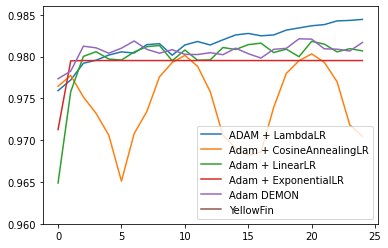

In [ ]:
import pylab as plt

l_adam_lambda = []
l_adam_cos = []
l_adam_linear = []
l_adam_exp = []
l_demon = []
l_yellowfin = []
for i in range(len(acc_cosine)):
  l_adam_lambda.append(acc_lambda[i].item())
  l_adam_cos.append(acc_cosine[i].item())
  l_adam_linear.append(acc_linear[i].item())
  l_adam_exp.append(acc_exponential[i].item())
  l_demon.append(acc_demon[i])
  l_yellowfin.append(acc_yellowfin[i].item())

plt.plot(l_adam_lambda, label="ADAM + LambdaLR")
plt.plot(l_adam_cos, label = "Adam + CosineAnnealingLR")
plt.plot(l_adam_linear, label = "Adam + LinearLR")
plt.plot(l_adam_exp, label = "Adam + ExponentialLR")
plt.plot(l_demon, label = "Adam DEMON")
plt.plot(l_yellowfin, label = "YellowFin")
plt.ylim(0.96,0.99)
plt.legend()
plt.show()